In [3]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Step 1. Load the dataset
# Credits:  California Cooperative Oceanic Fisheries Investigations
# URL: https://www.kaggle.com/datasets/sohier/calcofi?select=bottle.csv
# Drescription: The CalCOFI data set represents the longest (1949-present) 
# and most complete (more than 50,000 sampling stations) time series of 
# oceanographic and larval fish data in the world. It includes abundance 
# data on the larvae of over 250 species of fish; larval length frequency 
# data and egg abundance data on key commercial species; and oceanographic 
# and plankton data. The physical, chemical, and biological data collected 
# at regular time and space intervals quickly became valuable for 
# documenting climatic cycles in the California Current and a range of 
# biological responses to them. 

#df_raw = pd.read_csv('../data/raw/calcofi_reduced.csv') -> asi lo paso el profe, luego del info veo q tengo q ponerle index_col=0

df_raw = pd.read_csv('../data/raw/calcofi_reduced.csv', index_col=0)

In [9]:
# 1.1 Get basic info
df_raw.info()

#veo q tengo una variable q no sirve la del index, por eso le saco la columna indice, se la saco cuando abro el file

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  300 non-null    float64
 1   T_degC  300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [41]:
# 1.2 Take a sample
df_raw.sample(10)

,Salnty,T_degC
269,34.200,4.32
75,33.460,8.92
174,33.120,10.36
128,34.101,5.02
273,33.939,6.85
170,32.791,9.20
256,33.042,12.25
147,32.827,11.31
223,34.385,3.08
114,34.268,3.63


In [ ]:
# 1.3 Transform if needed
#Salnty -> salinidad
#T_degC -> grados en celcios

#en este caso no tengo q tranformar nada, no tengo var categoricas ni fechas

In [11]:
# Step 2. Make a basic EDA
df = df_raw.copy()
#simpre hacemos una copia luego de tranformar el dato crudo
#crudos sin tocar
#interin -> va el df, despues de hacer el copi, mando este dato a la capeta data interin, o sea el csv cortado
#proces

In [42]:
# 2.1 Split the dataset so to avoid bias
X = df['Salnty'] #esta es nuestra var X son las variables predictoras
y = df['T_degC'] #nuestra y

#separamos antes del EDA, para evitar el sesgo y hago el EDA solo en el data set de test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53)

#con esto evito es sesgo




In [53]:
# 2.2 Join the train sets to ease insights
#x pongo todas las variables predictorias q quiero, uso mas braquets vero otros ejemplos de clase q tenemos

df_train = pd.DataFrame({'Salinity':X_train,'Temperature':y_train})

In [44]:
# 2.3 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Salnty  300 non-null    float64
 1   T_degC  300 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [54]:
# 2.4 Take a sample
df_train.sample(10)

,Salinity,Temperature
39,34.408,2.88
220,33.165,9.90
46,32.840,11.61
191,33.926,6.93
246,33.212,12.66
35,33.533,8.60
82,32.740,9.70
175,33.490,9.17
95,33.147,10.21
210,33.996,4.71


In [55]:
# 2.5 Describe the numerical and date variables
df_train.describe() #medidas de tendencia central y descripcion

,Salinity,Temperature
count,225.000000,225.000000
mean,33.591058,7.975911
std,0.565969,2.930263
min,32.630000,2.780000
25%,33.010000,5.140000
50%,33.724000,8.290000
75%,34.101000,10.220000
max,34.450000,12.660000


In [22]:
# 2.6 Describe the categorical variables
#aca cambiaria las variables a categoricas si ubiera


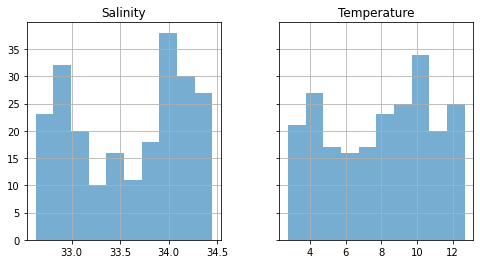

In [56]:
# 2.7 Perform univariate analysis - histograms
df_train.hist(figsize=(8,4),sharey=True,alpha=0.6)
plt.show()

#no veo ninguna campana, por lo q no se ve normal

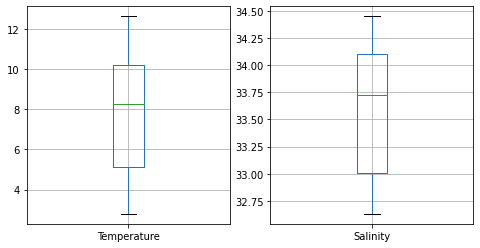

In [57]:
# 2.8 Perform univariate analysis - boxplots

fig,ax = plt.subplots(1,2,figsize=(8,4))
df_train[['Temperature']].boxplot(ax=ax[0])
df_train[['Salinity']].boxplot(ax=ax[1])
plt.show()

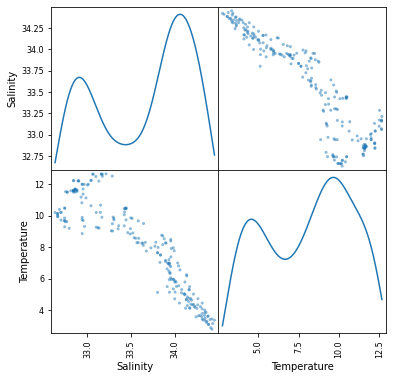

In [69]:
# 2.9 Perform bivariate analysis - scatter matrix

pd.plotting.scatter_matrix(df_train,diagonal='kde',figsize=(6,6))
plt.show()


In [ ]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
#tenemos una sola variablae por eso no se hace esto

In [ ]:
# 2.11 Perform multivariate analysis - VIF
#tenemos una sola variablae por eso no se hace esto

In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals
#objetivo es prnosticar en base al problema
#utilizo los modelados y veo cual sirve, escribo porq  eligo el aproach de porq estoy haciendo eso en modelamiento
#si uso regresion etc, aca solo escribo , detallo lo q voy a hacer

In [64]:
# 3.1 Perform model fit - A

#R2 : proportion of the variance in DV explained by IV
sklm = LinearRegression() #primer modelo con sklearn
sklm.fit(X_train.to_frame(),y_train)
score = sklm.score(X_train.to_frame(),y_train)
print(f'score is {score: .4f}')

#cuando es solo una var predictora, sklearn no interpreta bien tengo q ponerle el to_frame
#si tengo 2 o mas vars predictorias no preciso el to_frame



score is  0.8304


In [65]:
#corro el metodo de evaluacion, en el dataset de prueba
predictions = sklm.predict(X_test.to_frame())
print(f'The R2 score is: {r2_score(y_test,predictions)}')
print(f'The RMSE: Root mean squared error is : {mean_squared_error(y_test, predictions,squared=False)}')

The R2 score is: 0.8373339448154533
The RMSE: Root mean squared error is : 1.233686982872781


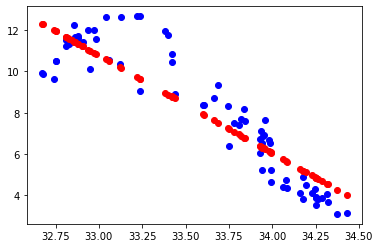

In [66]:
plt.scatter(x=X_test, y=y_test, color='Blue')
plt.scatter(x=X_test, y=predictions, color='Red')
plt.show()

In [70]:
# 3.2 Perform model fit - B
#me faltan los intervalos de confianza, me tiene q dar el mismo resultado q el anterior , esto da mas info! q el anterior.
results = smf.ols('Temperature ~ Salinity', data=df_train).fit() #uso la formula full R
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1091.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           7.28e-88
Time:                        22:29:34   Log-Likelihood:                -361.08
No. Observations:                 225   AIC:                             726.2
Df Residuals:                     223   BIC:                             733.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    166.4537      4.798     34.695      0.0

In [ ]:
#y = a + bX

In [ ]:
# 3.3 Calculate metrics on model A

In [ ]:
# 3.4 Calculate metrics on model B

In [ ]:
# Step 4. Write up your conclusions
#Hemos utilizado los sig pasos para calclar
#hemos decidido retirar los valores por x y x 
#hemos encontrado var de ..
#cuento la historia de los datos q levante
#y concluyo q este modelo puede ajustarse .. escuchar el replay de la clase, porq fue muy rapido!

#el modelo es una consecuencia de un buen eda

#puedo poner recomendaciones

#